# Simple Model 

In [1]:
from bayespy.nodes import Beta, Bernoulli, Mixture
from bayespy.inference import VB

from numpy import array
import pandas as pd

# Index of the readings 
#Each row is triplet [bag, color, status]
data = pd.DataFrame([[0,0,True], 
                     [1,0,True], 
                     [0,4,False]], 
                     [0,4,False], columns=['bag','color','status'])

D = 5
n_bags = 3
N = 100
P = []
#For each bag create a Bernouli distribution of the different colors inside it
for bag in range(n_bags):
    P.append(Beta([0.5,0.5],
        plates=(D,),
        name='P_'+ str(bag)))

print(P[0].plates)

X = []
Q = []
for bag in range(n_bags):
    #Filtering all observations from a single bag
    single_bag_color_index = data[data['bag'] == bag]['color'].as_matrix()
    single_bag_color_value = data[data['bag'] == bag]['status'].as_matrix()
    #Reshaping it to be (number_of_readings,1) format for matching with plates
    single_bag_color_index = single_bag_color_index.reshape((single_bag_color_index.shape[0],1))
    single_bag_color_value = single_bag_color_value.reshape((single_bag_color_value.shape[0],1))
    #Creating a mixture model with bag name and the probability of each bag
    X.append(Mixture(single_bag_color_index, Bernoulli, P[bag]))
    #Observing the data
    X[bag].observe(single_bag_color_value)
    # Creating inference engine
    Q.append(VB(X[bag],P[bag]))
    Q[bag].update(repeat=1000)



(5,)
Iteration 1: loglike=-1.386294e+00 (0.003 seconds)
Iteration 2: loglike=-1.386294e+00 (0.003 seconds)
Converged at iteration 2.
Iteration 1: loglike=-6.931472e-01 (0.003 seconds)
Iteration 2: loglike=-6.931472e-01 (0.003 seconds)
Converged at iteration 2.
Iteration 1: loglike=0.000000e+00 (0.007 seconds)
Iteration 2: loglike=0.000000e+00 (0.007 seconds)
Iteration 3: loglike=0.000000e+00 (0.007 seconds)
Iteration 4: loglike=0.000000e+00 (0.002 seconds)
Iteration 5: loglike=0.000000e+00 (0.002 seconds)
Iteration 6: loglike=0.000000e+00 (0.002 seconds)
Iteration 7: loglike=0.000000e+00 (0.002 seconds)
Iteration 8: loglike=0.000000e+00 (0.002 seconds)
Iteration 9: loglike=0.000000e+00 (0.002 seconds)
Iteration 10: loglike=0.000000e+00 (0.002 seconds)
Iteration 11: loglike=0.000000e+00 (0.002 seconds)
Iteration 12: loglike=0.000000e+00 (0.005 seconds)
Iteration 13: loglike=0.000000e+00 (0.004 seconds)
Iteration 14: loglike=0.000000e+00 (0.005 seconds)
Iteration 15: loglike=0.000000e+00

In [51]:
for bag in range(n_bags):
    print(P[bag].get_parameters())

[array([[ 1.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  1.5]])]
[array([[ 1.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5]])]
[array([[ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5]])]


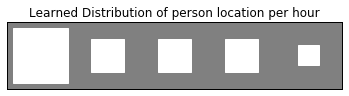

In [52]:
%matplotlib inline
import bayespy.plot as bpplt
bpplt.hinton(P[0])
bpplt.pyplot.title("Learned Distribution 1 bag per color")
bpplt.pyplot.show()

# With Hierarchical Model



In [5]:
from bayespy.nodes import Beta, Bernoulli, Mixture, Gamma, DirichletConcentration
from bayespy.inference import VB

from numpy import array
import pandas as pd

# Index of the readings 
#Each row is triplet [bag, color, status]
data = pd.DataFrame([[0,0,True], 
                     [1,0,True], 
                     [0,4,False]], 
                     [0,4,False], columns=['bag','color','status'])

D = 5
n_bags = 3
N = 100
P = []

# Creating Hyper priors for the Bernouli distribution 
p_conc = DirichletConcentration(2) # for beta and gamma 
p_conc.initialize_from_value([0.5, 0.5]) # intialize 
#For each bag create a Bernouli distribution of the different colors inside it
for bag in range(n_bags):
    P.append(Beta(p_conc,
        plates=(D,),
        name='P_'+ str(bag)))

print(P[0].plates)

X = []
Q = []
for bag in range(n_bags):
    #Filtering all observations from a single bag
    single_bag_color_index = data[data['bag'] == bag]['color'].as_matrix()
    single_bag_color_value = data[data['bag'] == bag]['status'].as_matrix()
    #Reshaping it to be (number_of_readings,1) format for matching with plates
    single_bag_color_index = single_bag_color_index.reshape((single_bag_color_index.shape[0],1))
    single_bag_color_value = single_bag_color_value.reshape((single_bag_color_value.shape[0],1))
    #Creating a mixture model with bag name and the probability of each bag
    X.append(Mixture(single_bag_color_index, Bernoulli, P[bag]))
    #Observing the data
    X[bag].observe(single_bag_color_value)
    # Creating inference engine
    Q.append(VB(X[bag],P[bag],p_conc))
    Q[bag].update(repeat=1000)



(5,)
Iteration 1: loglike=-3.169802e+00 (0.008 seconds)
Iteration 2: loglike=-3.066083e+00 (0.010 seconds)
Iteration 3: loglike=-2.964799e+00 (0.010 seconds)
Iteration 4: loglike=-2.865604e+00 (0.009 seconds)
Iteration 5: loglike=-2.768166e+00 (0.010 seconds)
Iteration 6: loglike=-2.672221e+00 (0.012 seconds)
Iteration 7: loglike=-2.577449e+00 (0.018 seconds)
Iteration 8: loglike=-2.483605e+00 (0.028 seconds)
Iteration 9: loglike=-2.390486e+00 (0.019 seconds)
Iteration 10: loglike=-2.297916e+00 (0.022 seconds)
Iteration 11: loglike=-2.205759e+00 (0.027 seconds)
Iteration 12: loglike=-2.113912e+00 (0.028 seconds)
Iteration 13: loglike=-2.022293e+00 (0.042 seconds)
Iteration 14: loglike=-1.930839e+00 (0.038 seconds)
Iteration 15: loglike=-1.839514e+00 (0.055 seconds)
Iteration 16: loglike=-1.748284e+00 (0.062 seconds)
Iteration 17: loglike=-1.657133e+00 (0.071 seconds)
Iteration 18: loglike=-1.566048e+00 (0.071 seconds)
Iteration 19: loglike=-1.475018e+00 (0.082 seconds)
Iteration 20: lo

/home/deebuls/anaconda3/lib/python3.5/site-packages/bayespy/inference/vmp/vmp.py:734: UserWarning: Lower bound decreased 1.046835e-02! Bug somewhere or numerical inaccuracy?
  "numerical inaccuracy?" % L_diff)
/home/deebuls/anaconda3/lib/python3.5/site-packages/bayespy/inference/vmp/vmp.py:734: UserWarning: Lower bound decreased 4.601524e-03! Bug somewhere or numerical inaccuracy?
  "numerical inaccuracy?" % L_diff)



Converged at iteration 2.


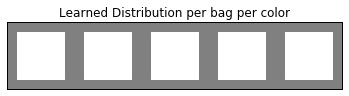

In [2]:
%matplotlib inline
import bayespy.plot as bpplt
bpplt.hinton(P[0])
bpplt.pyplot.title("Learned Distribution per bag per color")
bpplt.pyplot.show()

In [3]:
print(p_conc.get_moments())

[array([ 645.4629876,  645.4629876]), 896.77097816805781]


In [4]:
p_conc_alpha = DirichletConcentration(1) # for beta and gamma 
p_conc_beta = DirichletConcentration(1)
p_conc_alpha.initialize_from_value([0.5])
p_conc_beta.initialize_from_value([0.5])
#p_conc.initialize_from_value([0.5, 0.5]) # intialize 
P = Beta([p_conc_alpha, p_conc_beta], plates=(5,), name='P')
data = array([[0,True],[0,True],[4,True]])
Z = Mixture(data[:,0], Bernoulli, P)
Z.observe(data[:,1])
Q = VB(Z, P, p_conc)
Q.update(repeat=1000)

TypeError: unorderable types: Concentration() < int()

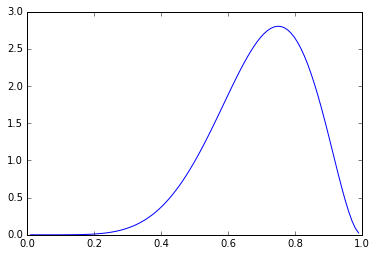

In [53]:
from bayespy.nodes import Bernoulli, Beta
>>> p = Beta([1e-3, 1e-3])
>>> z = Bernoulli(p, plates=(10,))
>>> z.observe([0, 1, 1, 1, 0, 1, 1, 1, 0, 1])
>>> p.update()
>>> import bayespy.plot as bpplt
>>> import numpy as np
>>> bpplt.pdf(p, np.linspace(0, 1, num=100))